# Sprint ゲート付きリカレントニューラルネットワーク完了課題
## 1.このSprintについて
### Sprintの目的
発展的なRNNの手法を理解する
ドキュメントを網羅的に読む
### どのように学ぶか
Kerasに用意されているRNN関係のレイヤーを動作させながら学んでいきます。

## 2.KerasのRecurrentレイヤー
Kerasには複数のRecurrentレイヤーや、それに関連したクラスが用意されています。今回のSprintではこれら全てを動かした上で、それぞれの役割を説明できる状態を目指します。

以下のドキュメントにまとめられています。

[Recurrentレイヤー - Keras Documentation](https://diver.diveintocode.jp/curriculums/2006 "Recurrentレイヤー - Keras Documentation")

### 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。

SimpleRNN
GRU
LSTM
ConvLSTM2D
これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。

Keras公式のサンプルコードを利用してください。

### LSTMのサンプルコード

[keras/imdb_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py "keras/imdb_lstm.py at master · keras-team/keras")

### ConvLSTM2Dのサンプルコード

[keras/conv_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/conv_lstm.py "keras/conv_lstm.py at master · keras-team/keras")

このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。  
全て実行する上での実行時間を考慮した数に設定してください。

In [4]:
'''
#Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
**Notes**
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 123s 5ms/step - loss: 0.4632 - acc: 0.7810 - val_loss: 0.4210 - val_acc: 0.8074
Epoch 2/15
25000/25000 [==============================] - 117s 5ms/step - loss: 0.2980 - acc: 0.8783 - val_loss: 0.4097 - val_acc: 0.8207
Epoch 3/15
25000/25000 [==============================] - 117s 5ms/step - loss: 0.2141 - acc: 0.9166 - val_loss: 0.4187 - val_acc: 0.8268
Epoch 4/15
25000/25000 [==============================] - 117s 5ms/step - loss: 0.1452 - acc: 0.9460 - val_loss: 0.4790 - val_acc: 0.8159
Epoch 5/15
25000/25000 [==============================] - 114s 5ms/step - loss: 0.1093 - acc: 0.9602 - val_loss: 0.5667 - val_acc: 0.8197
Epoch 6/15
25000/25000 [==============================] - 113s 5ms/step - loss: 0.0735 - acc:

Train on 99 samples, validate on 901 samples
Epoch 1/1
99/99 [==============================] - 559s 6s/step - loss: 0.8029 - val_loss: 0.4799


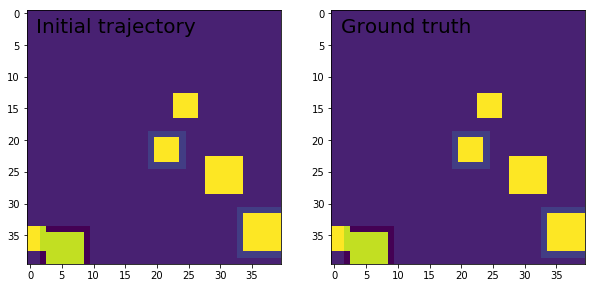

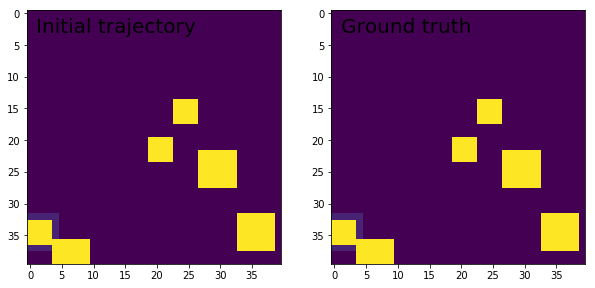

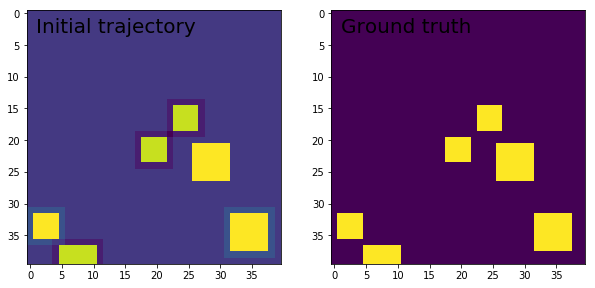

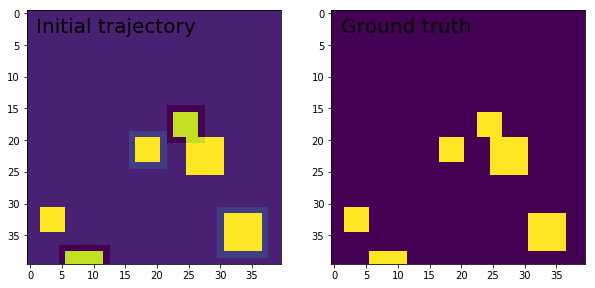

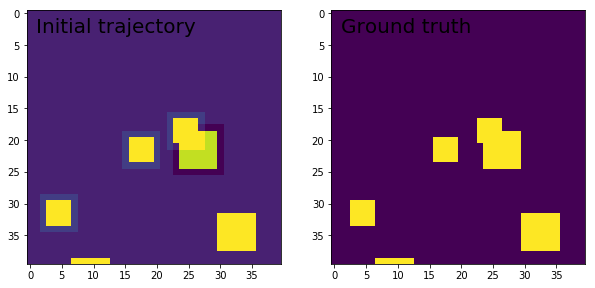

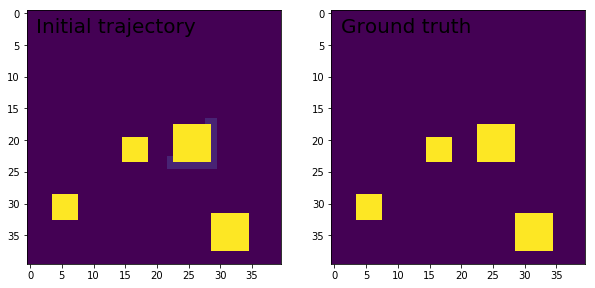

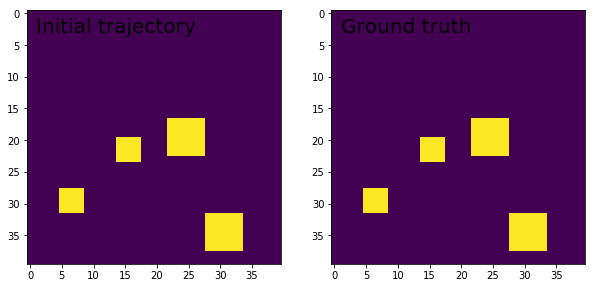

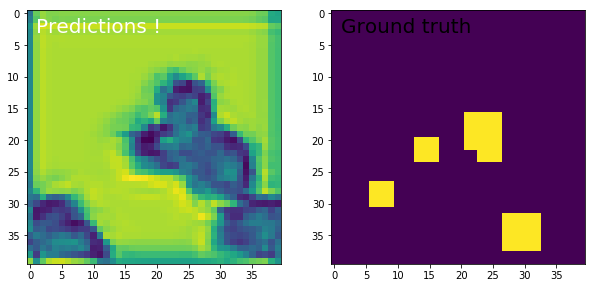

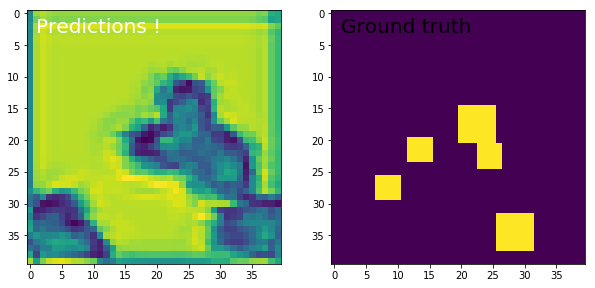

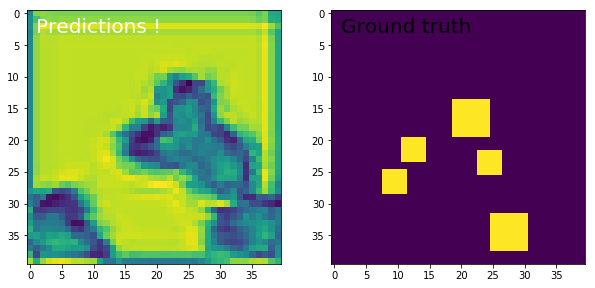

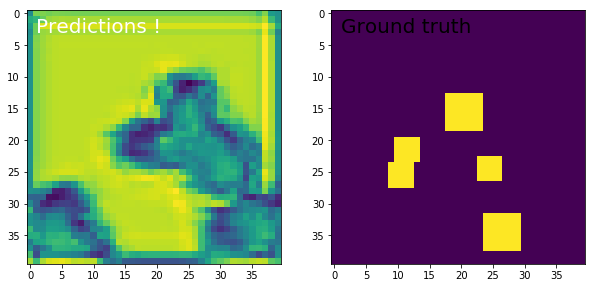

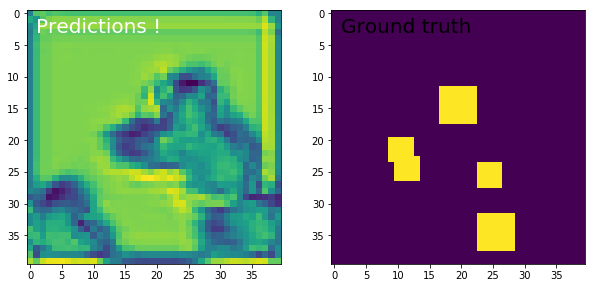

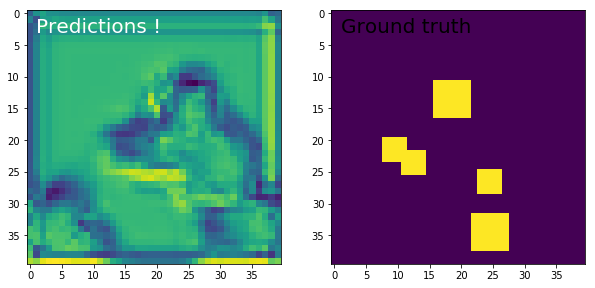

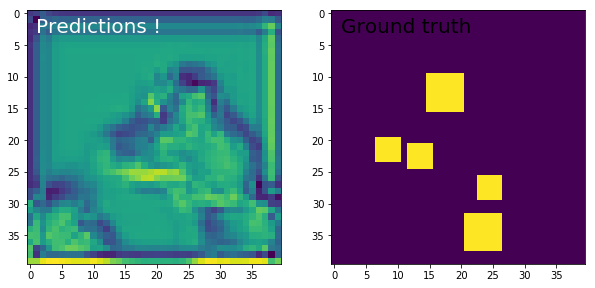

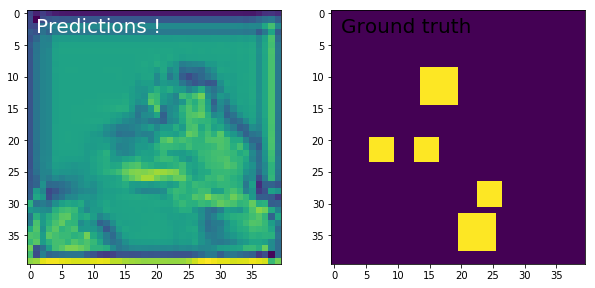

In [11]:
"""
#This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=1, validation_split=0.90)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

## 【問題2】（アドバンス課題）複数のデータセット間での比較
他のデータセットでも実験を行なってください。

[データセット - Keras Documentation](https://keras.io/ja/datasets/#_5 "データセット - Keras Documentation")

Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。

### 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。

RNN  
SimpleRNNCell  
GRUCell  
LSTMCell  
StackedRNNCells  
CuDNNGRU  
CuDNNLSTM  

### RNN
```
keras.layers.RNN(cell, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False)
```

Recurrentレイヤーに対する基底クラス．
#### 入力のshape

shapeが(batch_size, timesteps, input_dim)の3階テンソル．

#### 出力のshape

return_stateの場合：テンソルのリスト．最初のテンソルが出力になります．残りのテンソルは最終状態で，それぞれのshapeは(batch_size, units)です．
return_sequencesの場合：shapeが(batch_size, timesteps, input_dim)の3階テンソル．
それ以外の場合：shapeが(batch_size, input_dim)の2階テンソル．
マスキング

このレイヤーはタイムステップの変数を持つ入力データに対するマスキングをサポートします． あなたのデータにマスクを導入するためには， mask_zeroパラメータにTrueを渡したEmbeddingレイヤーを利用してください．

#### RNNで状態管理を利用するときの注意点

RNNレイヤーを'stateful'にすることができます． これはあるバッチでサンプルに対して計算された状態が次のバッチのサンプルの初期状態として再利用されるという意味です． これは別々の連続したバッチ内のサンプルが一対一対応することを仮定します．

状態管理を可能にするためには: - レイヤーコンストラクタにおいてstateful=Trueを指定してください． - モデルに一定のバッチサイズを指定してください． もしsequentialモデルなら: batch_input_shape=(...)を最初のレイヤーに 1つ以上の入力層をもったfunctionalモデルなら: batch_input_shape=(...)をモデルのすべての最初のレイヤーに 渡すことで固定系列長のバッチサイズを指定してください． これはバッチサイズを含む入力の期待されるshapeです． これは整数のタプルであるべきです，例えば(32, 10, 100)． - fit()を呼ぶときは，stateful=False を指定してください．

モデルの状態を再設定するには，指定したレイヤーもしくはモデル全体で.reset_states()を呼び出してください．

#### RNNの初期状態を指定するときの注意点

initial_stateのキーワード引数を渡してRNNを呼び出すことで，内部状態の初期値を指定できます． initial_stateの値は，RNNの初期値を表現したテンソルかテンソルのリストです．

#### RNNに外部定数を渡すときの注意

（RNN.callのように）RNN.__call__メソッドのconstantsキーワード引数を使うことによって「外部」定数を渡せます． cell.callメソッドがconstantsと同じキーワード変数を受け入れる必要があります． そのような定数は，アテンションメカニズムで知られるような，追加の固定入力（時間変動しない）におけるcellの変化の状態として使われます．

### SimpleRNN
```
keras.layers.SimpleRNN(units, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False)  
```

出力が入力にフィードバックされる全結合RNN．

### GRUCell
```
keras.layers.GRUCell(units, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=1)
```
GRUレイヤーのためのCellクラス．


### LSTMCell
```
keras.layers.LSTMCell(units, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=1)
```
LSTMレイヤーのためのcellクラス．

### StackedRNNCells
```
keras.layers.StackedRNNCells(cells)
```
RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー．

効率的なstacked RNNを実装するために使われます．

#### 引数

cells: RNN cellインスタンスのリスト．

### CuDNNGRU
```
keras.layers.CuDNNGRU(units, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, return_sequences=False, return_state=False, stateful=False)
```
CuDNNを利用した高速なGRU実装．

TensorFlowバックエンドでGPU上でのみ動作します．

### CuDNNLSTM
```
keras.layers.CuDNNLSTM(units, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, return_sequences=False, return_state=False, stateful=False)
```
CuDNNを利用した高速なLSTM実装．

TensorFlowバックエンドでGPU上でのみ動作します．